In [146]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
sns.set()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [147]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
print("train shape:",train.shape)
print("\n--train info--")
print(train.info())

train shape: (891, 12)

--train info--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [150]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect="auto")
    plt.pie(feature_ratio,labels=feature_index,autopct='%1.1f%%')
    plt.title(feature+'\'s ratio in total')
    plt.show()
    
    for i,index in enumerate(feature_index):
        plt.subplot(1,feature_size,i+1, aspect='equal')
        plt.pie([survived[index],dead[index]],labels=['Survivied','Dead'],autopct='%1.1f%%')
        plt.title(str(index)+'\'s ratio')
                  
    plt.show()
                  

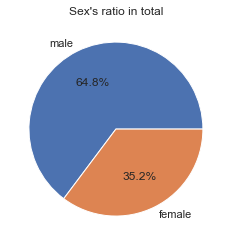

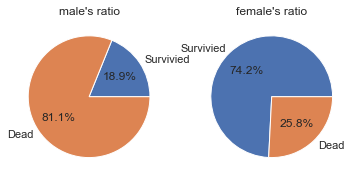

In [117]:
pie_chart('Sex')

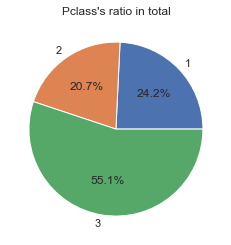

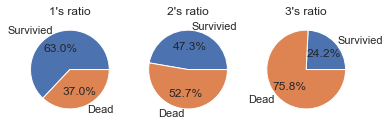

In [118]:
pie_chart('Pclass')
# 높은 클래스일수록 생존률 높음   

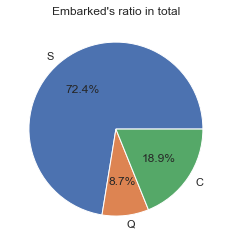

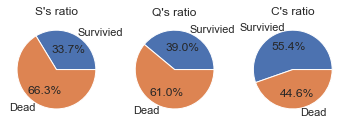

In [119]:
pie_chart('Embarked')
# C -> Q -> S

In [151]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

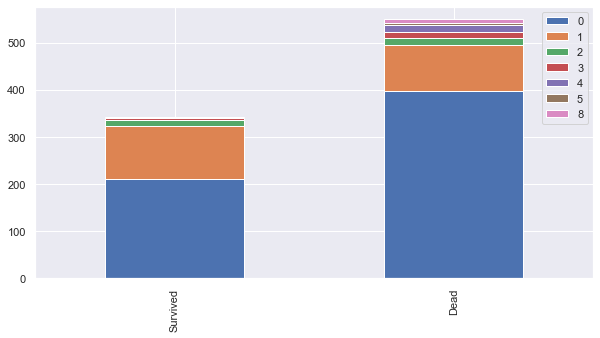

In [121]:
bar_chart("SibSp")

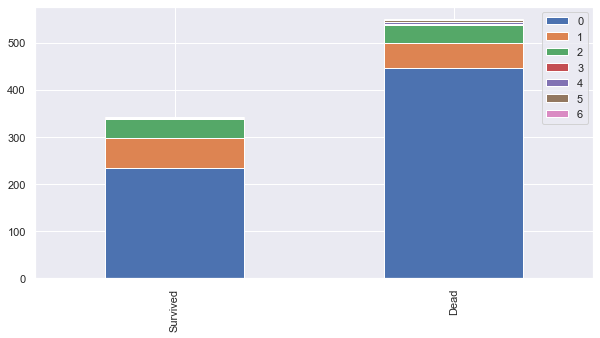

In [122]:
bar_chart("Parch")

In [152]:
train_and_test = [train,test]

In [153]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
    
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [154]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [155]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')    
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [156]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)
    
for dataset in train_and_test:
    dataset['Sec'] = dataset['Sex'].astype(str)

In [157]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [158]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

In [159]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'],5)
print(train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [160]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [161]:
print(train[['Pclass','Fare']].groupby(['Pclass'],as_index=False).mean())
print("")
# test 에 Fare이 NaN인 값 하나 존재 
# 3클래스 평균 값인 13을 넣어줌 
print(test[test["Fare"].isnull()]["Pclass"])

for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.6755)

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [162]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [163]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset["Family"] = dataset["Family"].astype(int)

In [164]:
features_drop = ['Name','Ticket','Cabin','SibSp','Parch']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId','AgeBand'],axis=1)


In [166]:
print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title     Sec  Family
0         0       3    male   Young     0        S    Mr    male       1
1         1       1  female  Middle     4        C   Mrs  female       1
2         1       3  female   Young     1        S  Miss  female       0
3         1       1  female  Middle     4        S   Mrs  female       1
4         0       3    male  Middle     1        S    Mr    male       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title     Sec  Family
0          892       3    male  Middle     0        Q    Mr    male       0
1          893       3  female  Middle     0        S   Mrs  female       1
2          894       2    male   Prime     1        Q    Mr    male       0
3          895       3    male   Young     1        S    Mr    male       0
4          896       3  female   Young     2        S   Mrs  female       2


In [167]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived',axis=1)
test_data = test.drop('PassengerId',axis=1).copy()

1. Logistic Regression
2. Support Vector Machine (SVM)
3. k-Nearest Neighbor (kNN)
4. Random Forest
5. Naive Bayes

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [174]:
train_data, train_label = shuffle(train_data,train_label,random_state =5)

In [175]:
def train_and_Test(model):
    model.fit(train_data,train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data,train_label)*100,2)
    print("Accuracy :",accuracy,"%")
    return prediction

In [179]:
# Logistic Regression
log_pred = train_and_Test(LogisticRegression())
# SVM
svm_pred = train_and_Test(SVC())
# KNN
knn_pred = train_and_Test(KNeighborsClassifier(n_neighbors=4))
# Random Forest
rf_pred = train_and_Test(RandomForestClassifier(n_estimators=100))
# Naive Bayes
nb_pred = train_and_Test(GaussianNB())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy : 82.72 %
Accuracy : 83.5 %
Accuracy : 84.06 %
Accuracy : 88.55 %
Accuracy : 80.13 %


In [180]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":rf_pred
})

submission.to_csv('submission_rf.csv',index=False)

1. Data에 있는 Outlier 제거하기 
2. 데이터 분석을 더 자세하게 하기 
3. NaN 값을 다른 방법으로 채워넣기 
4. 사용하지 않은 Feature(Ticket, Cabin) 활용하기 
5. 모델 설계, hyperparameter 선택, 평가(Cross Validation)를 직접 구현해서 진행하기